In [16]:
# reload packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Choose GPU (this may not be needed on your computer)

In [17]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [18]:
from tfumap.umap import tfUMAP

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [20]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [21]:
#dataset_address = 'http://file.biolab.si/opentsne/macosko_2015.pkl.gz'
# https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html
# also see https://github.com/berenslab/rna-seq-tsne/blob/master/umi-datasets.ipynb

In [22]:
import gzip
import pickle

with gzip.open(DATA_DIR / 'macosko_2015.pkl.gz', "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

In [23]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.1, random_state=42)

In [26]:
np.shape(X_train)

(40327, 50)

In [27]:
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

In [28]:
X_train_flat = X_train

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [30]:
Y_train = enc.fit_transform([[i] for i in Y_train]).flatten()

### Train PCA model

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
z = pca.fit_transform(X_train_flat)

### plot output

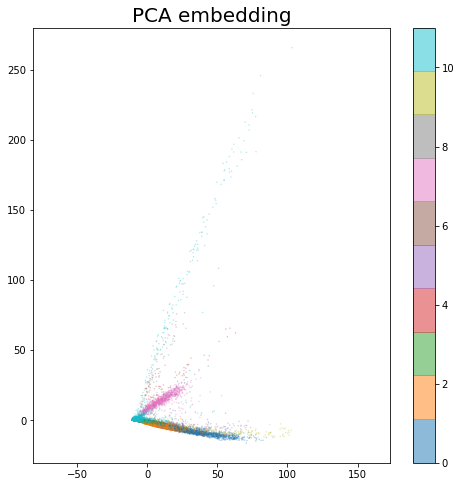

In [34]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save model

In [35]:
import os
import pickle

In [36]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [37]:
output_dir = MODEL_DIR/'projections'/ 'macosko2015' / 'PCA'
ensure_dir(output_dir)

In [38]:
with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

In [39]:
np.save(output_dir / 'z.npy', z)

## tsne

In [40]:
from openTSNE import TSNE

In [41]:
tsne = TSNE(
    n_components = 2
)

In [42]:
embedding_train = tsne.fit(X_train_flat)

In [43]:
z = np.array(embedding_train)

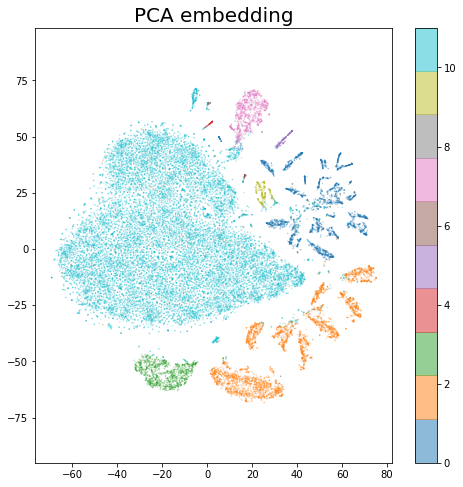

In [44]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

#### save model

In [46]:
import os
import pickle

from tfumap.paths import ensure_dir, MODEL_DIR

output_dir = MODEL_DIR/'projections'/ 'macosko2015' / 'TSNE'
ensure_dir(output_dir)

with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

np.save(output_dir / 'z.npy', z)